# Data Science - Gráfico com dados do World Bank sobre Aquecimento Global
## Nome: Guilherme Doretto Sobreiro | RM:99674

### Vamos importar as bibliotecas:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Agora, vamos carregar nossos dados a partir do arquivo CSV:

In [94]:
dados = pd.read_csv('long_format_annual_surface_temp.csv')

### Analisando o arquivo:

In [95]:
dados

,Country,ISO2,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,F1961,-0.113
1,Albania,AL,F1961,0.627
2,Algeria,DZ,F1961,0.164
3,American Samoa,AS,F1961,0.079
4,"Andorra, Principality of",AD,F1961,0.736
...,...,...,...,...
11217,West Bank and Gaza,PS,F2022,1.074
11218,Western Sahara,EH,F2022,1.970
11219,World,ZM,F2022,1.394
11220,Zambia,ZM,F2022,0.686


### Removendo o caractere 'F' da coluna 'Year' e converter os valores para o tipo inteiro:

In [ ]:
dados['Year'] = dados['Year'].str.replace('F', '').astype(int)

### Filtrando os dados do Brasil:

In [ ]:
dados_brasil = dados[dados['Country'] == 'Brazil']

### Criando o gráfico de linha para visualizar a variação de temperatura no Brasil ao longo do tempo:

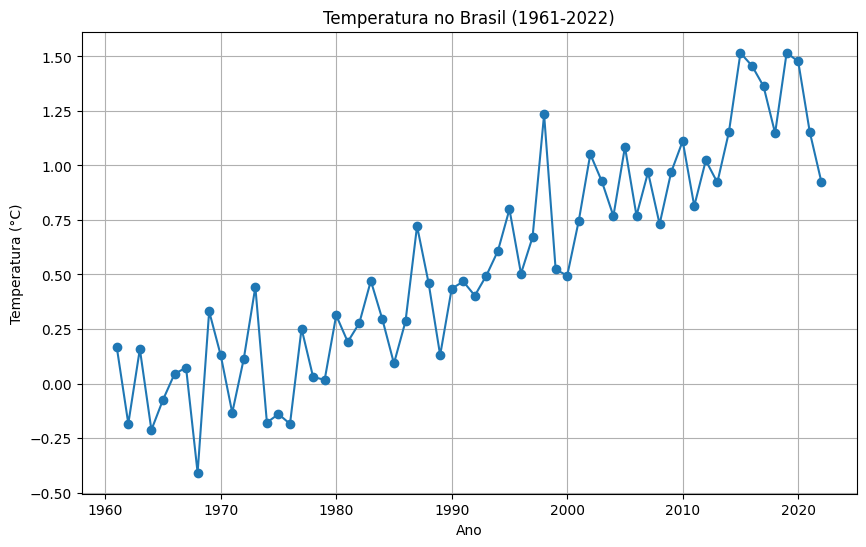

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil['Year'], dados_brasil['Temperature'], marker='o', linestyle='-')
plt.title('Temperatura no Brasil (1961-2022)')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

### Plotando o gráfico de barras para visualizar os países com maior variação de temperatura no ano de 2022:

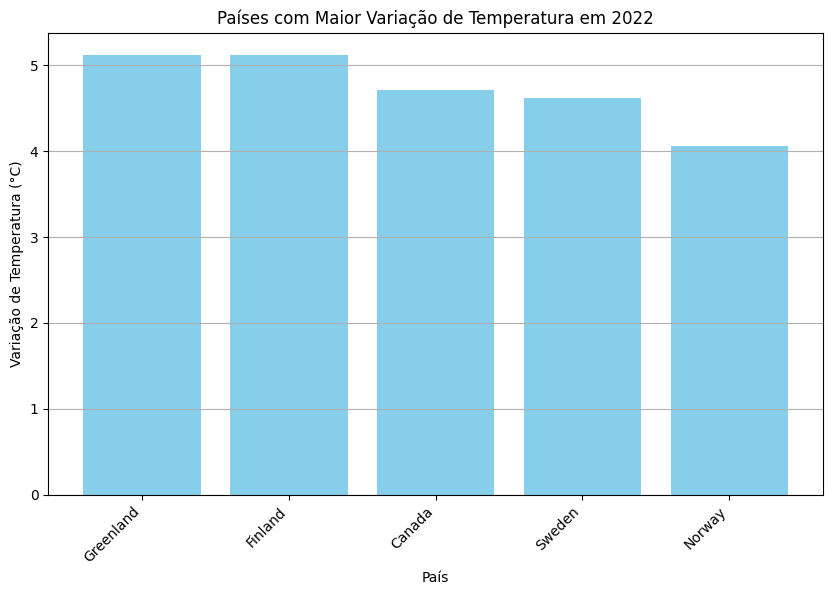

In [111]:
dados['Variação_Temperatura'] = dados.groupby('Country')['Temperature'].transform(lambda x: x.max() - x.min())

dados_2022 = dados[dados['Year'] == 2022]

top5_paises = dados_2022.nlargest(5, 'Variação_Temperatura')

plt.figure(figsize=(10, 6))
plt.bar(top5_paises['Country'], top5_paises['Variação_Temperatura'], color='skyblue')
plt.title('Países com Maior Variação de Temperatura em 2022')
plt.xlabel('País')
plt.ylabel('Variação de Temperatura (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

### Criando o histograma para visualizar a distribuição da temperatura no Brasil ao longo do tempo:

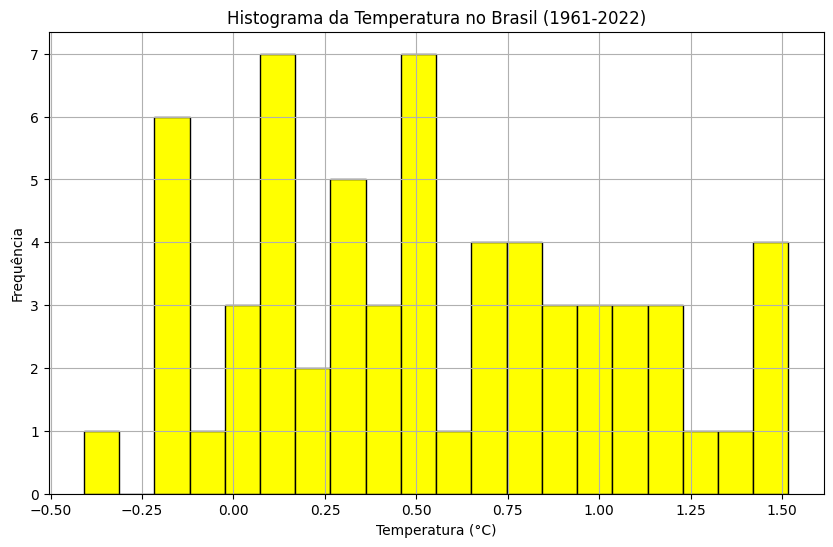

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(dados_brasil['Temperature'], bins=20, color='yellow', edgecolor='black')
plt.title('Histograma da Temperatura no Brasil (1961-2022)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### Criando gráfico de pizza que mostrará a contribuição relativa da temperatura média para os cinco países com maior variação de temperatura.

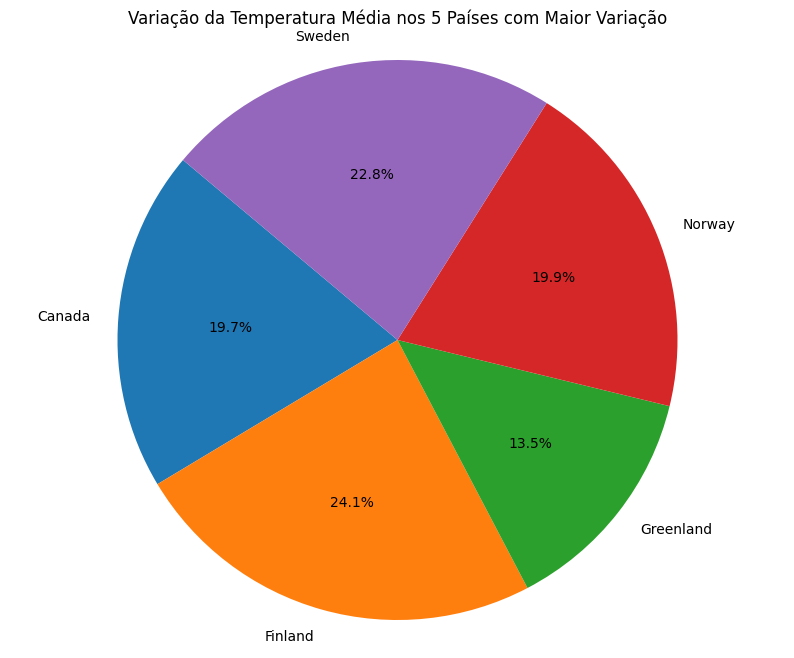

In [105]:
dados['Variação_Temperatura'] = dados.groupby('Country')['Temperature'].transform(lambda x: x.max() - x.min())

top5_paises_variacao = dados.groupby('Country')['Variação_Temperatura'].max().nlargest(5).index

dados_top5_paises_variacao = dados[dados['Country'].isin(top5_paises_variacao)]

temperatura_media_por_pais = dados_top5_paises_variacao.groupby('Country')['Temperature'].mean()

plt.figure(figsize=(10, 8))
plt.pie(temperatura_media_por_pais, labels=temperatura_media_por_pais.index, autopct='%1.1f%%', startangle=140)
plt.title('Variação da Temperatura Média nos 5 Países com Maior Variação')
plt.axis('equal')
plt.show()

### Criando o gráfico scatter que mostra os países com a maior variação de temperatura em cada ano. (1961 até 2022)

<ipython-input-110-9f91fb4b9448>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('tab10', len(paises_legenda))


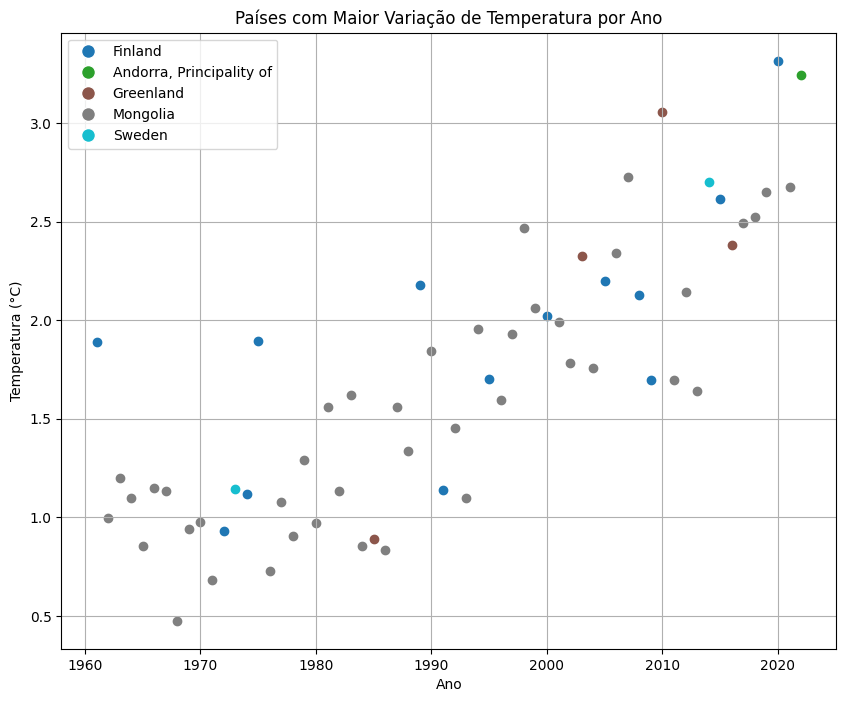

In [110]:
pais_maior_variacao_por_ano = dados.loc[dados.groupby('Year')['Temperature'].idxmax()]

num_paises_legenda = 5

paises_legenda = pais_maior_variacao_por_ano.nlargest(num_paises_legenda, 'Temperature')['Country']

cores = plt.cm.get_cmap('tab10', len(paises_legenda))

plt.figure(figsize=(10, 8))
for idx, row in pais_maior_variacao_por_ano.iterrows():
    pais = row['Country']
    if pais in paises_legenda.values:
        cor = cores(np.where(paises_legenda.values == pais)[0])
        plt.scatter(row['Year'], row['Temperature'], label=pais, color=cor)
    else:
        plt.scatter(row['Year'], row['Temperature'], color='gray')

plt.title('Países com Maior Variação de Temperatura por Ano')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')

legendas = []
for pais in paises_legenda:
    cor = cores(np.where(paises_legenda.values == pais)[0])
    legendas.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cor, markersize=10, label=pais))
plt.legend(handles=legendas, loc='upper left')

plt.grid(True)
plt.show()